<a href="https://colab.research.google.com/github/PatrickCmd/lane_detection_opencv/blob/main/Find_Lanes_for_self_driving_cars_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find Lanes for self-driving cars(computer-vision)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


## Display image


In [ ]:
datasets_paths = "gdrive/MyDrive/Colab Notebooks/datasets"
img = f"{datasets_paths}/test_image.jpeg"
print(os.path.isdir(datasets_paths))
print(os.path.isfile(img))

# Display image
image = cv2.imread(img)
print(image)
# cv2.imshow("image", image)  # cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# As a substitution, consider using
# from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
# cv2_imshow(image)


True
True
[[[116  91  75]
  [194 174 134]
  [194 174 134]
  ...
  [248 238 215]
  [248 238 215]
  [248 238 215]]

 [[157 133 106]
  [194 174 134]
  [194 174 134]
  ...
  [247 238 215]
  [247 238 215]
  [247 238 215]]

 [[185 163 127]
  [194 174 134]
  [194 174 134]
  ...
  [247 238 215]
  [247 238 215]
  [247 238 215]]

 ...

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 73  74  82]
  [ 73  74  82]
  [ 73  74  82]]

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 72  73  81]
  [ 72  73  81]
  [ 72  73  81]]

 [[ 74  80  85]
  [ 74  80  85]
  [ 74  80  85]
  ...
  [ 72  73  81]
  [ 72  73  81]
  [ 72  73  81]]]


## Plot Image

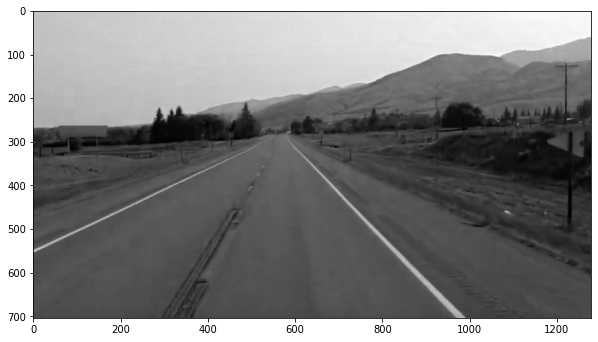

In [ ]:
# plot frame
plt.figure(figsize=(10, 10))
plt.imshow(image[:,:,0], cmap="gray")
plt.show()

## Canny Detection

**Edge Detection**: Identifying sharp changes in intensity in adjacent pixels.

 - 0: Indicates no intensity(black) and

 - 255: Indicates maximum intensity (white)


 **Gradient**: Measure of change in brightness over adjacent pixels

 ![gradient change]("gdrive/MyDrive/Colab Notebooks/datasets/gradient.png")

 ![gradient change]("gdrive/MyDrive/Colab Notebooks/datasets/gradient.png")

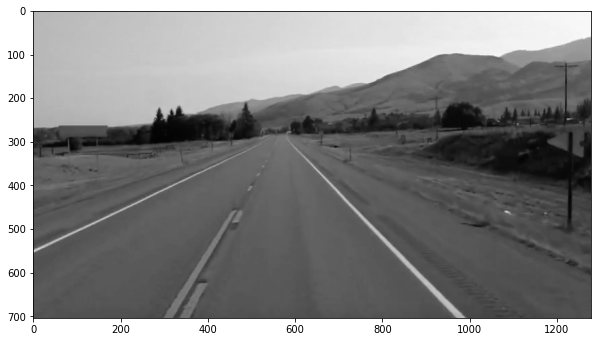

In [ ]:
# make copy of original image
lane_image = image.copy()
# Make gray scale (1 channel) from color image
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap="gray")
plt.show()

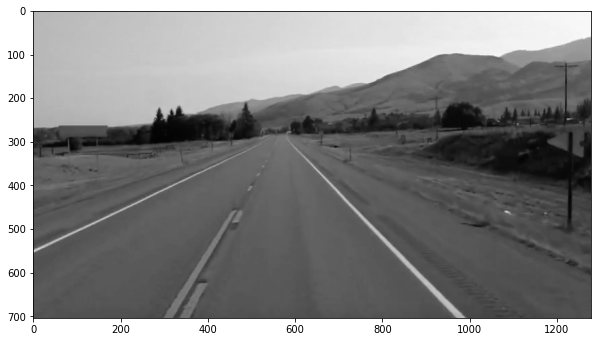

In [ ]:
# Apply Gaussian Blur
# Reduce Noise and smoothen the image

blur = cv2.GaussianBlur(gray, (5, 5), 0)   #(image, (5 x 5 channel), 0 deviation)

plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap="gray")
plt.show()

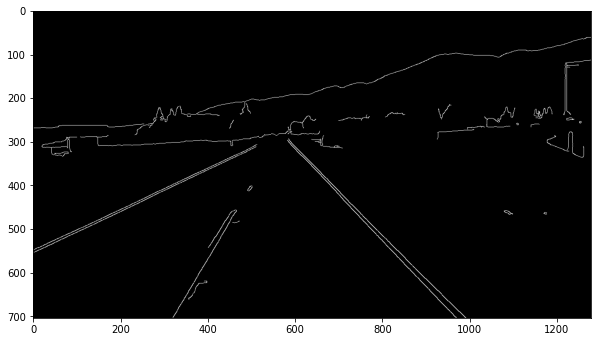

In [ ]:
## Apply canny function to identify edges in the image
## Which in process applies the Gaussian Blur
## Traces and outlines the edges that correspond or above the highest intensity
## Gradients that exceed the high threshold are traced as bright pixels
## Small gradients are not traced at all and are black and below the lower threshold
canny1 = cv2.Canny(blur, 50, 150)  # cv2.Canny(image, low_threshold, high_threshold)

plt.figure(figsize=(10, 10))
plt.imshow(canny1, cmap="gray")
plt.show()

In [ ]:
# defining canny function to encapsulate our code
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)

    return canny

## Hough Line Transformation (Finding Lane Lines  Region of Interest)

(704, 1279)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


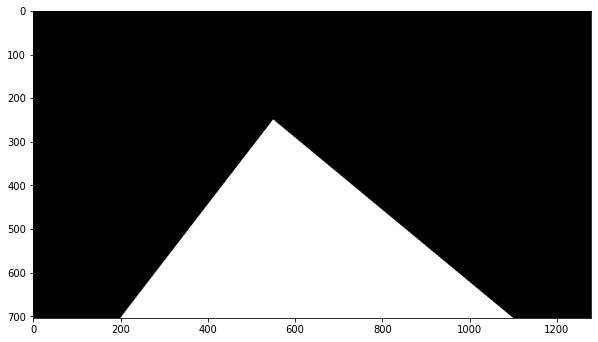

In [ ]:
def region_of_interest(image):
    print(image.shape)
    height = image.shape[0]
    polygon = np.array([[(200, height), (1100, height), (550, 250)]])  # Triangle polygon
    mask = np.zeros_like(image)
    print(mask)
    cv2.fillPoly(mask, polygon, 255)  # 255 color of polygon
    return mask

canny_image = canny(lane_image)
mask = region_of_interest(canny_image)

plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap="gray")
plt.show()

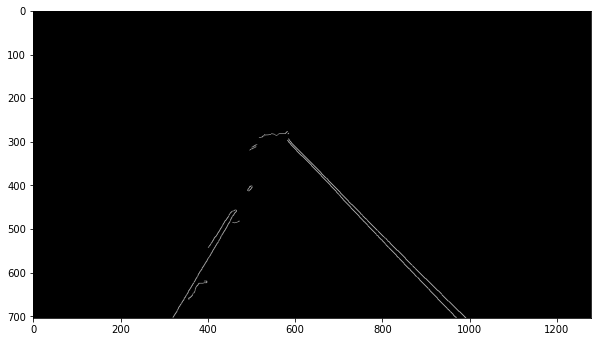

In [ ]:
def masked_image(canny, mask):
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image

mask_image = masked_image(canny_image, mask)
plt.figure(figsize=(10, 10))
plt.imshow(mask_image, cmap="gray")
plt.show()

[[[704 418 927 641]]

 [[704 426 791 516]]]


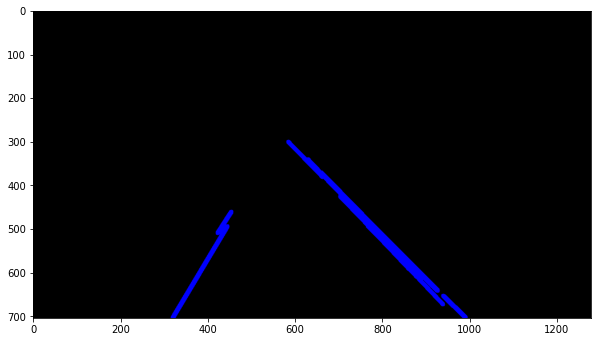

In [ ]:
# Apply Hough Line Transformation to detect straight line in
# Region of interest.

# cv2.HoughLinesP(image, pixels, 1 radian(degrees), threshold, placeholder-array, acceptable-linelength, maximum-linegap)
lines = cv2.HoughLinesP(mask_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
print(lines[:2])

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Draw a line
            # cv2.line(image, coordinates1, coordinates2, RGBCOLOR, line-thickness)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)
    return line_image

line_image = display_lines(lane_image, lines)
plt.figure(figsize=(10, 10))
plt.imshow(line_image, cmap="gray")
plt.show()

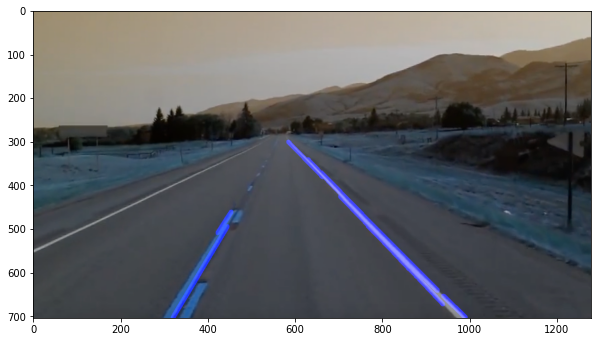

In [ ]:
# display and add lines on the original image
# cv2.addWeighted(image, image_weight, line_image, line_weight, gamma)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

plt.figure(figsize=(10, 10))
plt.imshow(combo_image, cmap="gray")
plt.show()

## Line Optimization

Display multiple lines into a single smooth trace

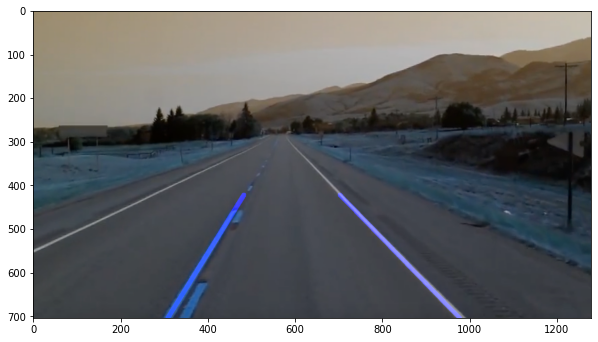

In [ ]:
def make_points(image, line):
    """Specify point coordinates of the line (y = mx + c)"""
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([[x1, y1, x2, y2]])
 

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    if lines is None:
        return None
    for line in lines:
        x1, y1, x2, y2 = line[0]
        fit = np.polyfit((x1,x2), (y1,y2), 1)
        slope = fit[0]
        intercept = fit[1]
        if slope < 0: # y is reversed in image (Negative slope)
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines


averaged_lines = average_slope_intercept(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)

plt.figure(figsize=(10, 10))
plt.imshow(combo_image, cmap="gray")
plt.show()

# Finding Lines in Captured Video

In [36]:
video = f"{datasets_paths}/test2.mp4"
print(video)

# set a video capture object
cap = cv2.VideoCapture(video)
while(cap.isOpened()):
    _, frame = cap.read()  # bool, frame/image
    canny_image = canny(frame)
    cropped_canny = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    # cv2.imshow("result", combo_image)
    cv2_imshow(combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

gdrive/MyDrive/Colab Notebooks/datasets/test2.mp4
